# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def create_all_data_matrixes(df, x_axis, y_axis, value_axes, variable_param=None):
  nb_rows = len(set(df[x_axis]))
  nb_columns = len(set(df[y_axis]))
  row_labels = df[x_axis]
  column_labels = df[y_axis]

  if (variable_param == None):
    result = {}
    for k in value_axes:
      data = np.zeros((nb_rows, nb_columns))
      for i in range(0, nb_rows):
        for j in range(0, nb_columns):
          data[i][j] = float(df[k][nb_columns * i + j])

      result[k] = data
    return [result]

  nb_variable_param = len(set(df[variable_param]))
  matrixes = {}
  for l in range(0, nb_variable_param):
    result = {}
    for k in value_axes:
      data = np.zeros((nb_rows, nb_columns))
      for i in range(0, nb_rows):
        for j in range(0, nb_columns):
          data[i][j] = float(df[k][nb_columns * nb_rows * l + nb_columns * i + j])

      result[k] = data
    matrixes[df[variable_param][nb_columns * nb_rows * l]] = result

  return matrixes


def generate_heatmaps_3params(x_axis, y_axis, variable_param=None):
  df = pd.read_csv('opt.csv')
  indicators = ['Total Returns', 'Sharpe Ratio', 'Max Drawdown', 'Drawdown Duration']
  indicators_colormaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens]
  row_labels = df[x_axis]
  column_labels = df[y_axis]

  matrixes = create_all_data_matrixes(df, x_axis, y_axis, indicators, variable_param=variable_param)
    
  print(matrixes)

  for i in range(0, len(indicators)):
    for k in list(matrixes.keys()):
      indicator = indicators[i]
      data = matrixes[k][indicator]
      fig, ax = plt.subplots()
      heatmap = ax.pcolor(data, cmap=indicators_colormaps[i])

      for y in range(data.shape[0]):
        for x in range(data.shape[1]):
          plt.text(x + 0.5, y + 0.5, "%.2f%%" % data[y, x],
            horizontalalignment="center",
            verticalalignment="center",
          )

      plt.colorbar(heatmap)
      ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
      ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
      ax.set_xticklabels(row_labels, minor=False)
      ax.set_yticklabels(column_labels, minor=False)
      plt.suptitle('{} - {}: {}'.format(indicator, variable_param, k), fontsize=18)
      plt.xlabel(x_axis, fontsize=14)
      plt.ylabel(y_axis, fontsize=14)

  plt.show()

def generate_heatmaps_2params(x_axis, y_axis):
  df = pd.read_csv('opt.csv')
  indicators = ['Total Returns', 'Sharpe Ratio', 'Max Drawdown', 'Drawdown Duration']
  indicators_colormaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens]
  row_labels = df[x_axis]
  column_labels = df[y_axis]

  matrixes = create_all_data_matrixes(df, x_axis, y_axis, indicators)

  for i in range(0, len(indicators)):
      indicator = indicators[i]
      data = matrixes[0][indicator]
      fig, ax = plt.subplots()
      heatmap = ax.pcolor(data, cmap=indicators_colormaps[i])

      for y in range(data.shape[0]):
        for x in range(data.shape[1]):
          plt.text(x + 0.5, y + 0.5, "%.2f%%" % data[y, x],
            horizontalalignment="center",
            verticalalignment="center",
          )

      plt.colorbar(heatmap)
      ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
      ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
      ax.set_xticklabels(row_labels, minor=False)
      ax.set_yticklabels(column_labels, minor=False)
      plt.suptitle('{}'.format(indicator), fontsize=18)
      plt.xlabel(x_axis, fontsize=14)
      plt.ylabel(y_axis, fontsize=14)

  plt.show()


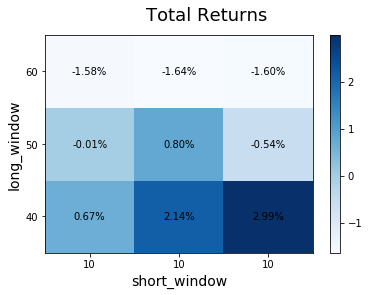

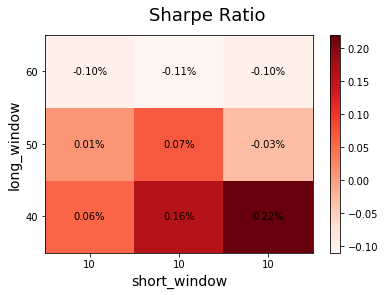

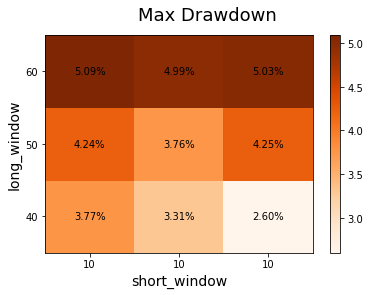

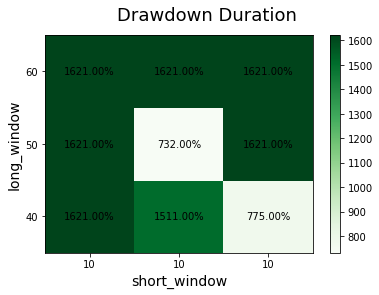

In [20]:
x_axis = 'short_window'
y_axis = 'long_window'
generate_heatmaps_2params(x_axis, y_axis)